In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_context('paper')

# Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/LeideSoares/machine_learning_portuguese_tutorial/master/a3_ML_portuguese_bank_telemarketing/bank-full.csv', delimiter = ';')

# Updating columns names
df.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
              'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome', 'subscription']

In [2]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [3]:
df.select_dtypes('object').describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,subscription
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
subscription    0
dtype: int64

In [8]:
# List (names) of numerical variables
var_num = df.select_dtypes(['int64']).columns.values
print(var_num)


# List (names) of categorical variables
var_cat = df.select_dtypes(['object']).columns.values
print('\n', var_cat)

['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']

 ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome' 'subscription']


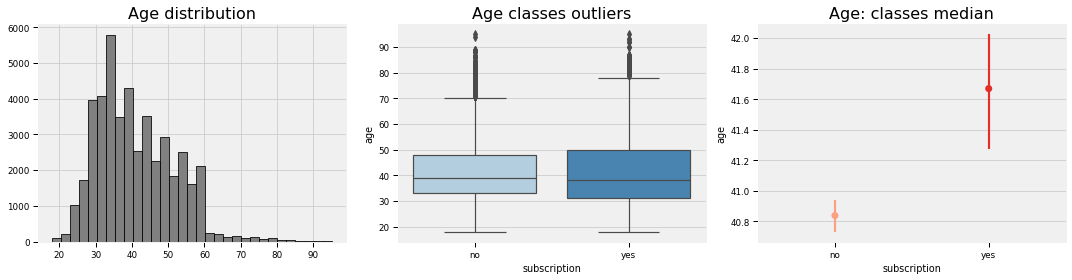

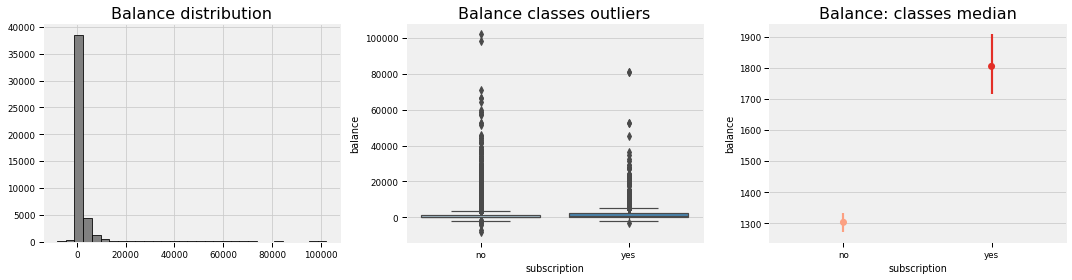

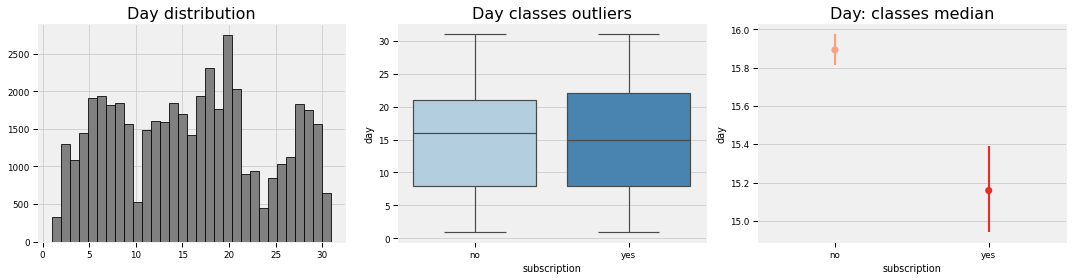

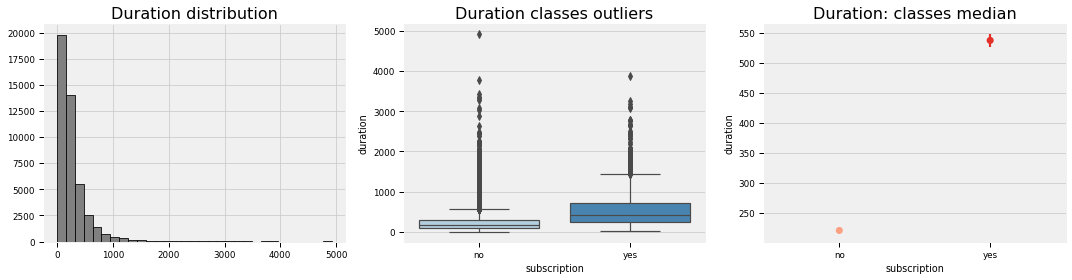

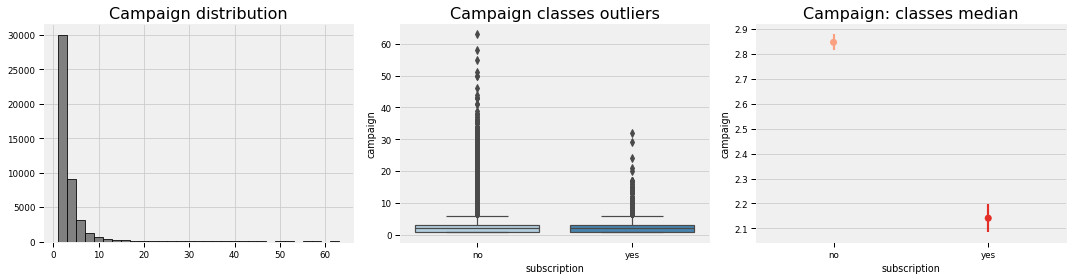

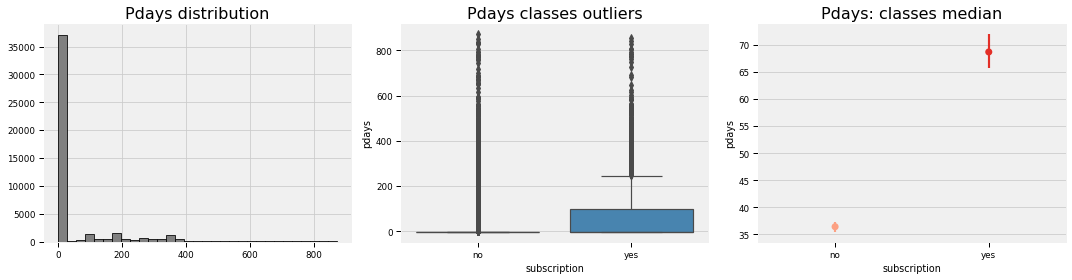

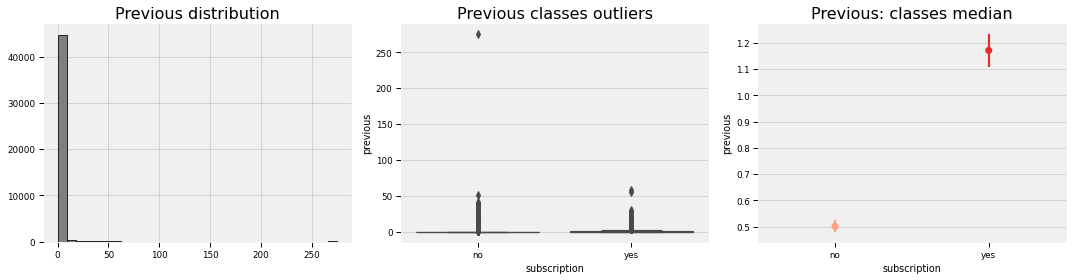

In [9]:
for col in var_num:
    # setting for multiple graphs
    fig, axs =  plt.subplots(nrows=1, ncols=3, figsize = (15,4))
    axs = axs.reshape(-1)
    
    # plotting the gerneral histogram
    axs[0].hist(df[col], bins=31, edgecolor = 'black', color = 'grey')#color = '#292929')
    axs[0].set_title(col.title() + ' distribution', fontsize=16)
    
    # plotting boxcox
    sns.boxplot(data=df, y=col, x='subscription', ax=axs[1], palette = 'Blues')
    axs[1].set_title(col.title() + ' classes outliers', fontsize=16)
    
    # plotting meadian of the subscrition (no/yes) classes
    sns.pointplot(data=df,y= col, x='subscription', ax=axs[2], palette = 'Reds')
    axs[2].set_title(col.title() + ': classes median', fontsize=16)
    
    plt.tight_layout()

In [10]:
df[var_cat]

,job,marital,education,default,housing,loan,contact,month,poutcome,subscription
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


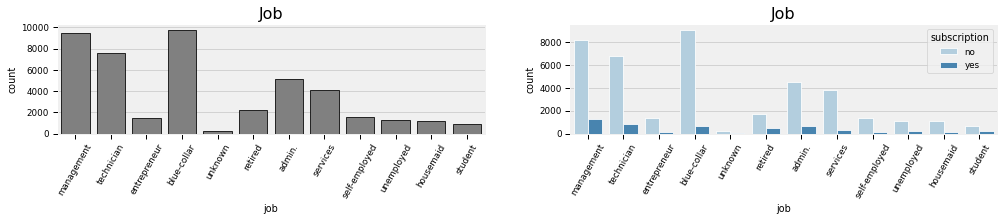

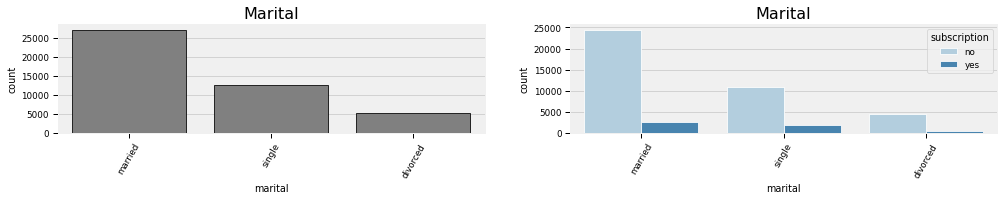

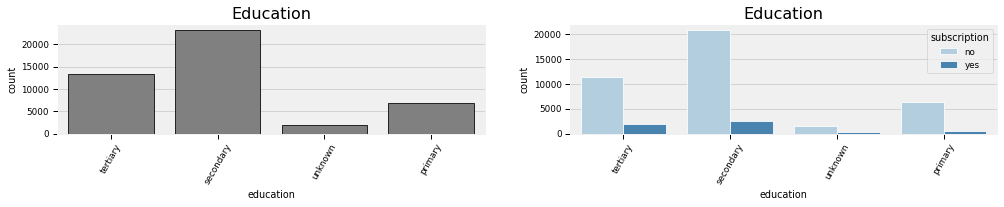

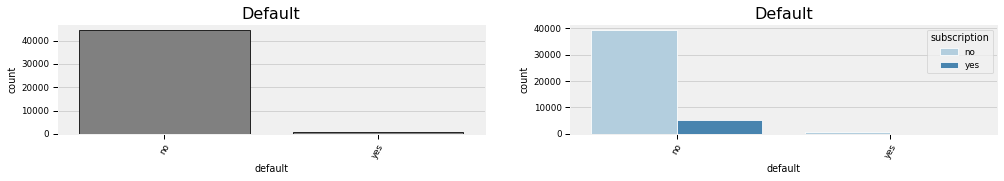

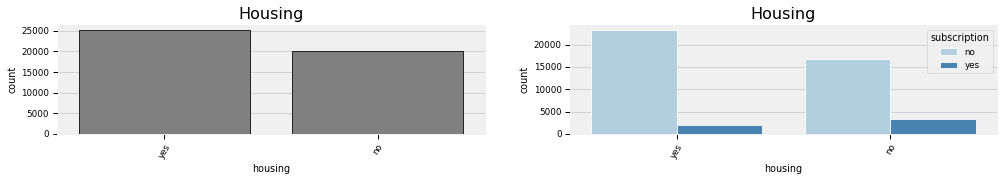

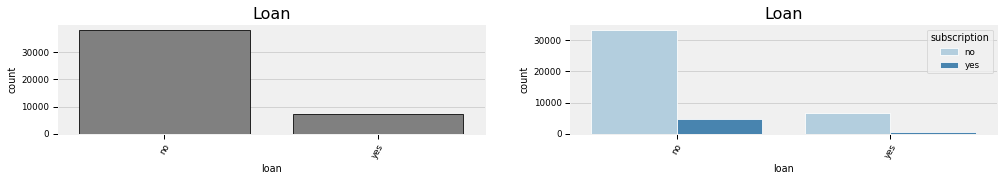

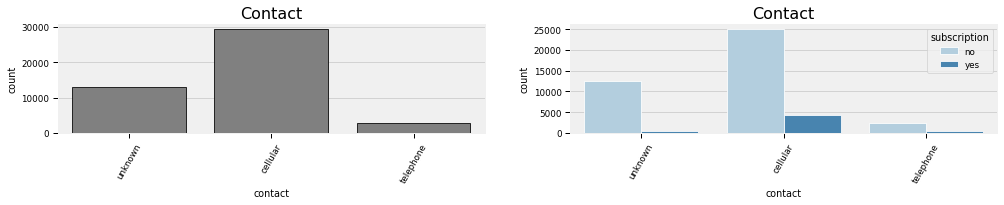

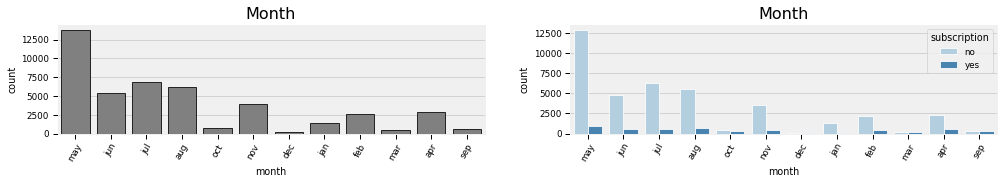

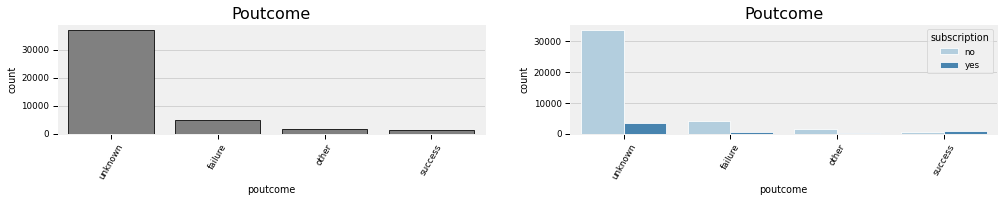

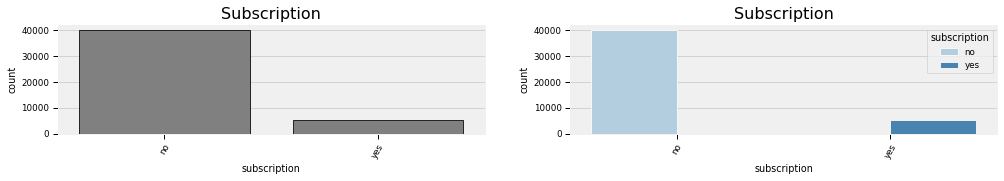

In [11]:
for col in var_cat:
    
    fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (15,2))
    axs = axs.reshape(-1)
    
    sns.countplot(data=df, x=col, ax=axs[0], edgecolor = 'black', color = 'grey')
    axs[0].set_title(col.title(), fontsize=16)
    axs[0].set_xticklabels(labels = df[col].unique(), rotation=60)
    
    sns.countplot(data=df, x= col, hue='subscription', ax=axs[1], palette = 'Blues', edgecolor = 'w')
    axs[1].set_title(col.title(), fontsize=16)
    axs[1].set_xticklabels(labels = df[col].unique(), rotation=60)
    
    #axs[1].set_legend()

In [12]:
def subscription_rate(feature, subscribe='yes'):
    """
    This function return the following feature in absolute and relative values (%)
    
    FEATURES & description:
    ---------------------------------------------------------------------------------------------------
        - total_contacted: ------- amount of contacts per categories in variable
        - total_subscribed: ------ amount of subscribed per categories
        - percentage_contacted: -- percentage of contacts per categories
        - percentage_sub_global: - percentage of subscribed per categories
        - percentage_sub_category: percentage of subscribed out of total cantacts in categories
                                   divide subscribed by total contacted within a category
    ---------------------------------------------------------------------------------------------------
    """
    
    data = df[feature].value_counts().rename('total_contacted').reset_index()
    data.set_index('index', inplace=True)
    data['total_subscribed'] = df[df.subscription == subscribe][feature].value_counts().loc[data.index]
    data['percentage_contacted'] = data.total_contacted / data.total_contacted.sum() * 100
    data['percentage_sub_global'] = data.total_subscribed / data.total_contacted.sum() * 100
    data['percentage_sub_category'] = data.total_subscribed / data.total_contacted * 100
    return data.sort_values('percentage_sub_category', ascending=False)

In [13]:
subscription_rate('job')

,total_contacted,total_subscribed,percentage_contacted,percentage_sub_global,percentage_sub_category
index,,,,,
student,938,269,2.074716,0.594988,28.678038
retired,2264,516,5.007631,1.141315,22.791519
unemployed,1303,202,2.882042,0.446794,15.502686
management,9458,1301,20.919688,2.877618,13.755551
admin.,5171,631,11.437482,1.395678,12.202669
self-employed,1579,187,3.492513,0.413616,11.842939
unknown,288,34,0.637013,0.075203,11.805556
technician,7597,840,16.803433,1.857955,11.056996
services,4154,369,9.188029,0.816173,8.883004


In [14]:
def plot_subscription_rate(feature, percentage=None):

    """
    This function is intended to plot with the following parametres:
    
    INPUTS:
    --------------------------------------------------------------------------------------------------------
    - feature: categorical variables from dataset
    - percentage: [None, global, cat_itself] - it controls which grouping variable to plot
                - None: plots amount of contacts vs subscribed for each categories e.g. job, month, etc
                - global: plot percentage of contacts vs subscribed for each categories e.g. job, month, etc
                - cat_itself: plots percentage of subscription out of  total contacts in category; 
                  e.g. 100% contact in category of them 25% subscribed
    
    PARAMETRES
    --------------------------------------------------------------------------------------------------------
    - params:  this is a list of tuples containing multiple parametre of plotting control
                - tuples[0] - contains item to control features to be plotted --> None, global, and cat_itself
                - tuples[1], tuples[2] - contains item to control sorting data and to get feature data
                    --> total_contacted, total_subscribed, etc
                - tuples[3] - item to control the title
    """
    
    
    params  = [
                (None, 'total_subscribed', 'total_contacted', 
                             'total_subscribed', 'Amount of Contacted & Subscribed'),
                ('global', 'percentage_sub_global', 'percentage_contacted', 
                             'percentage_sub_global', 'Percentage of Contacted & Subsribed'),
                ('cat_itself', 'percentage_sub_category', None, 'percentage_sub_category', 
                             'Percentage of Subscribed within Categories')
            ]


    for param in params:
        if percentage == param[0]:
            data_temp = subscription_rate(feature).sort_values(param[1], ascending=False)
            title = feature.upper() + ': ' + param[4]
            if param[2] == None:
                data_cont = pd.Series(np.ones(len(data_temp))*100, index = data_temp.index)
                data_sub = data_temp['percentage_sub_category']
            else:
                data_cont, data_sub = data_temp[param[2]], data_temp[param[3]]

    f, ax = plt.subplots(figsize = (6, 6))

    sns.set_color_codes('pastel')
    sns.barplot(x = data_cont, y = data_cont.index,
                label = 'Total Contacted', color = 'b', edgecolor = 'w')

    sns.set_color_codes('muted')
    sns.barplot(x = data_sub, y = data_sub.index,
                label = 'Total Subscribed', color = 'b', edgecolor = 'w')

    ax.legend(ncol = 2, loc = 'lower right', fontsize = 10)
    sns.despine(left = True, bottom = True)
    plt.title(title, fontsize = 14)
    plt.show()

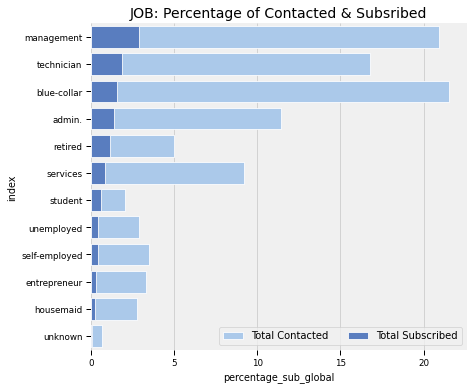

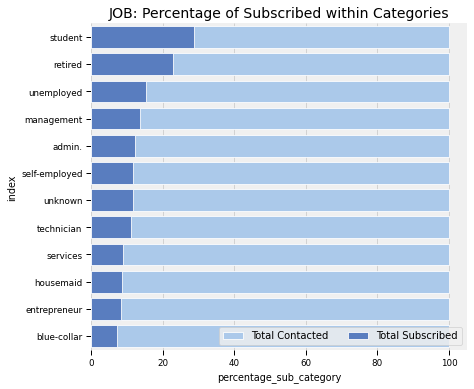

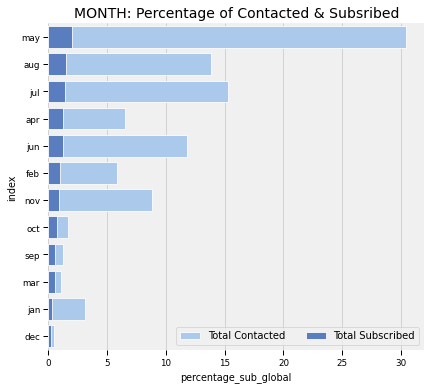

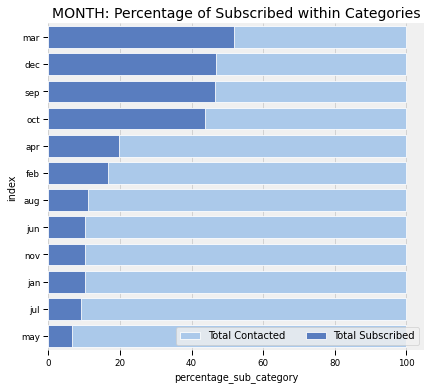

In [15]:
for col, plot in [('job', 'global'), ('job', 'cat_itself'), ('month', 'global'), ('month', 'cat_itself')]:
    plot_subscription_rate(col, plot)

<Figure size 2880x360 with 0 Axes>

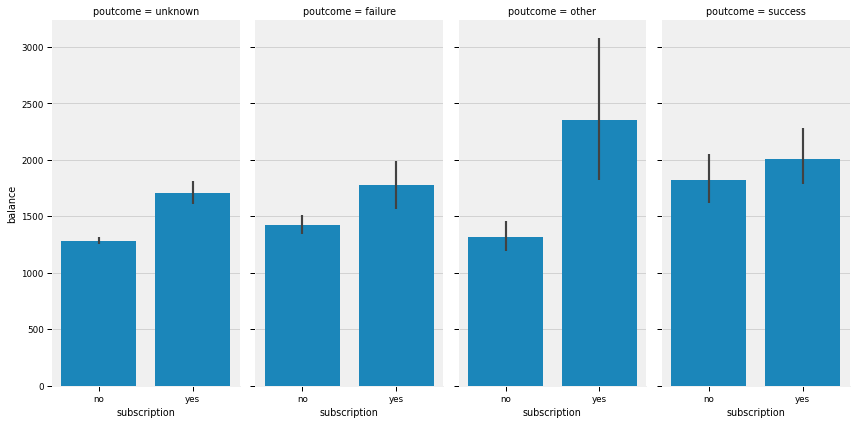

In [16]:
p = plt.figure(figsize=(40,5))
g = sns.FacetGrid(df, col="poutcome", height=6, aspect=.5)
g.map(sns.barplot, "subscription", "balance", order=["no", "yes"]);